In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import random
from Bio import SeqIO

In [2]:
pd.set_option('display.max_rows', 500)


In [89]:
%config InlineBackend.figure_format = 'retina'
sns.set(
    context="poster", # paper < notebook < talk < poster
    style="white",
    palette='deep', # sns.color_palette(), sns.cubehelix_palette(8, start=0, reverse=True)
    font='sans-serif',
    rc={
        # Style Context = sns.axes_style()
        'font.family': ['sans-serif'],
        'font.sans-serif': [
            # 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 
            'Arial'], # Fonts
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.titlesize':'x-large',
        # Plotting Context = sns.plotting_context()
        'axes.linewidth': 3, # Axes line width
    }
)

## PATHS

In [90]:
SampledTCSpath = os.path.join(os.getcwd(), "SampledTCS") #TCS identified from sampled geneomes
SampledGenomespath = os.path.join(os.getcwd(), "SampledGenomes") #list of sampled genomes from a taxanomic level
Genomespath = os.path.join(os.getcwd(), "GenomeDBs") #list of genomes for a taxanomic level
Align_path = os.path.join(os.getcwd(), "Alignment_Files") #.hmm files
TSNEpath = os.path.join(os.getcwd(), "TSNE_output") #store output from TSNE
Subcluster_path = os.path.join(os.getcwd(), "Alphaproteobacteria_subcluster")

### Use dimensional reduction to search for TCS in alphaproteobacteria that fall in the cluster of interest
 - The genes in this cluster are closely related to PP_3551, PP_1066, PP_1401
 - We will manually set boundaries to find closely related genes based on the proximity of genes in alphaproteobacteria to genes in *Pseudomonas putida* KT2440

In [91]:
TSNEs = []
for i in [4]:
    proteobactTSNE = pd.read_csv(os.path.join(TSNEpath, f"TSNEAlphaproteobacteriaDB_{i}.csv"))
    TSNEs.append(proteobactTSNE)
                            

In [92]:
def palette(source):
    order = ['no domain', 'Trans_reg_C', 'HTH_8', 'GerE', 'Sigma54_activat']
    colors = [ "#000000", "#e3ac2d","#de1c07","#0209d6","#de1c07"]
    
    orderedDomainPalette = dict(zip(order, colors))

    AllDomains =  source["DBD"].unique()
    n=len(AllDomains)*10
    greys= sns.color_palette("Greys",n_colors = n, desat=0)[int(n*.3):int(n*0.7)]
    AllDomainsPalette = dict()
    for i, domain in enumerate(AllDomains):
        if domain in order:
            AllDomainsPalette[domain] = orderedDomainPalette[domain]
        else:
            AllDomainsPalette[domain] = greys[i]
            
    
    
    
    return AllDomainsPalette

In [93]:
def pos_neg():
    return 1 if random.random() < 0.5 else -1
pos_neg()

-1

Text(0.5, 1.0, 'Alphaproteobacteria')

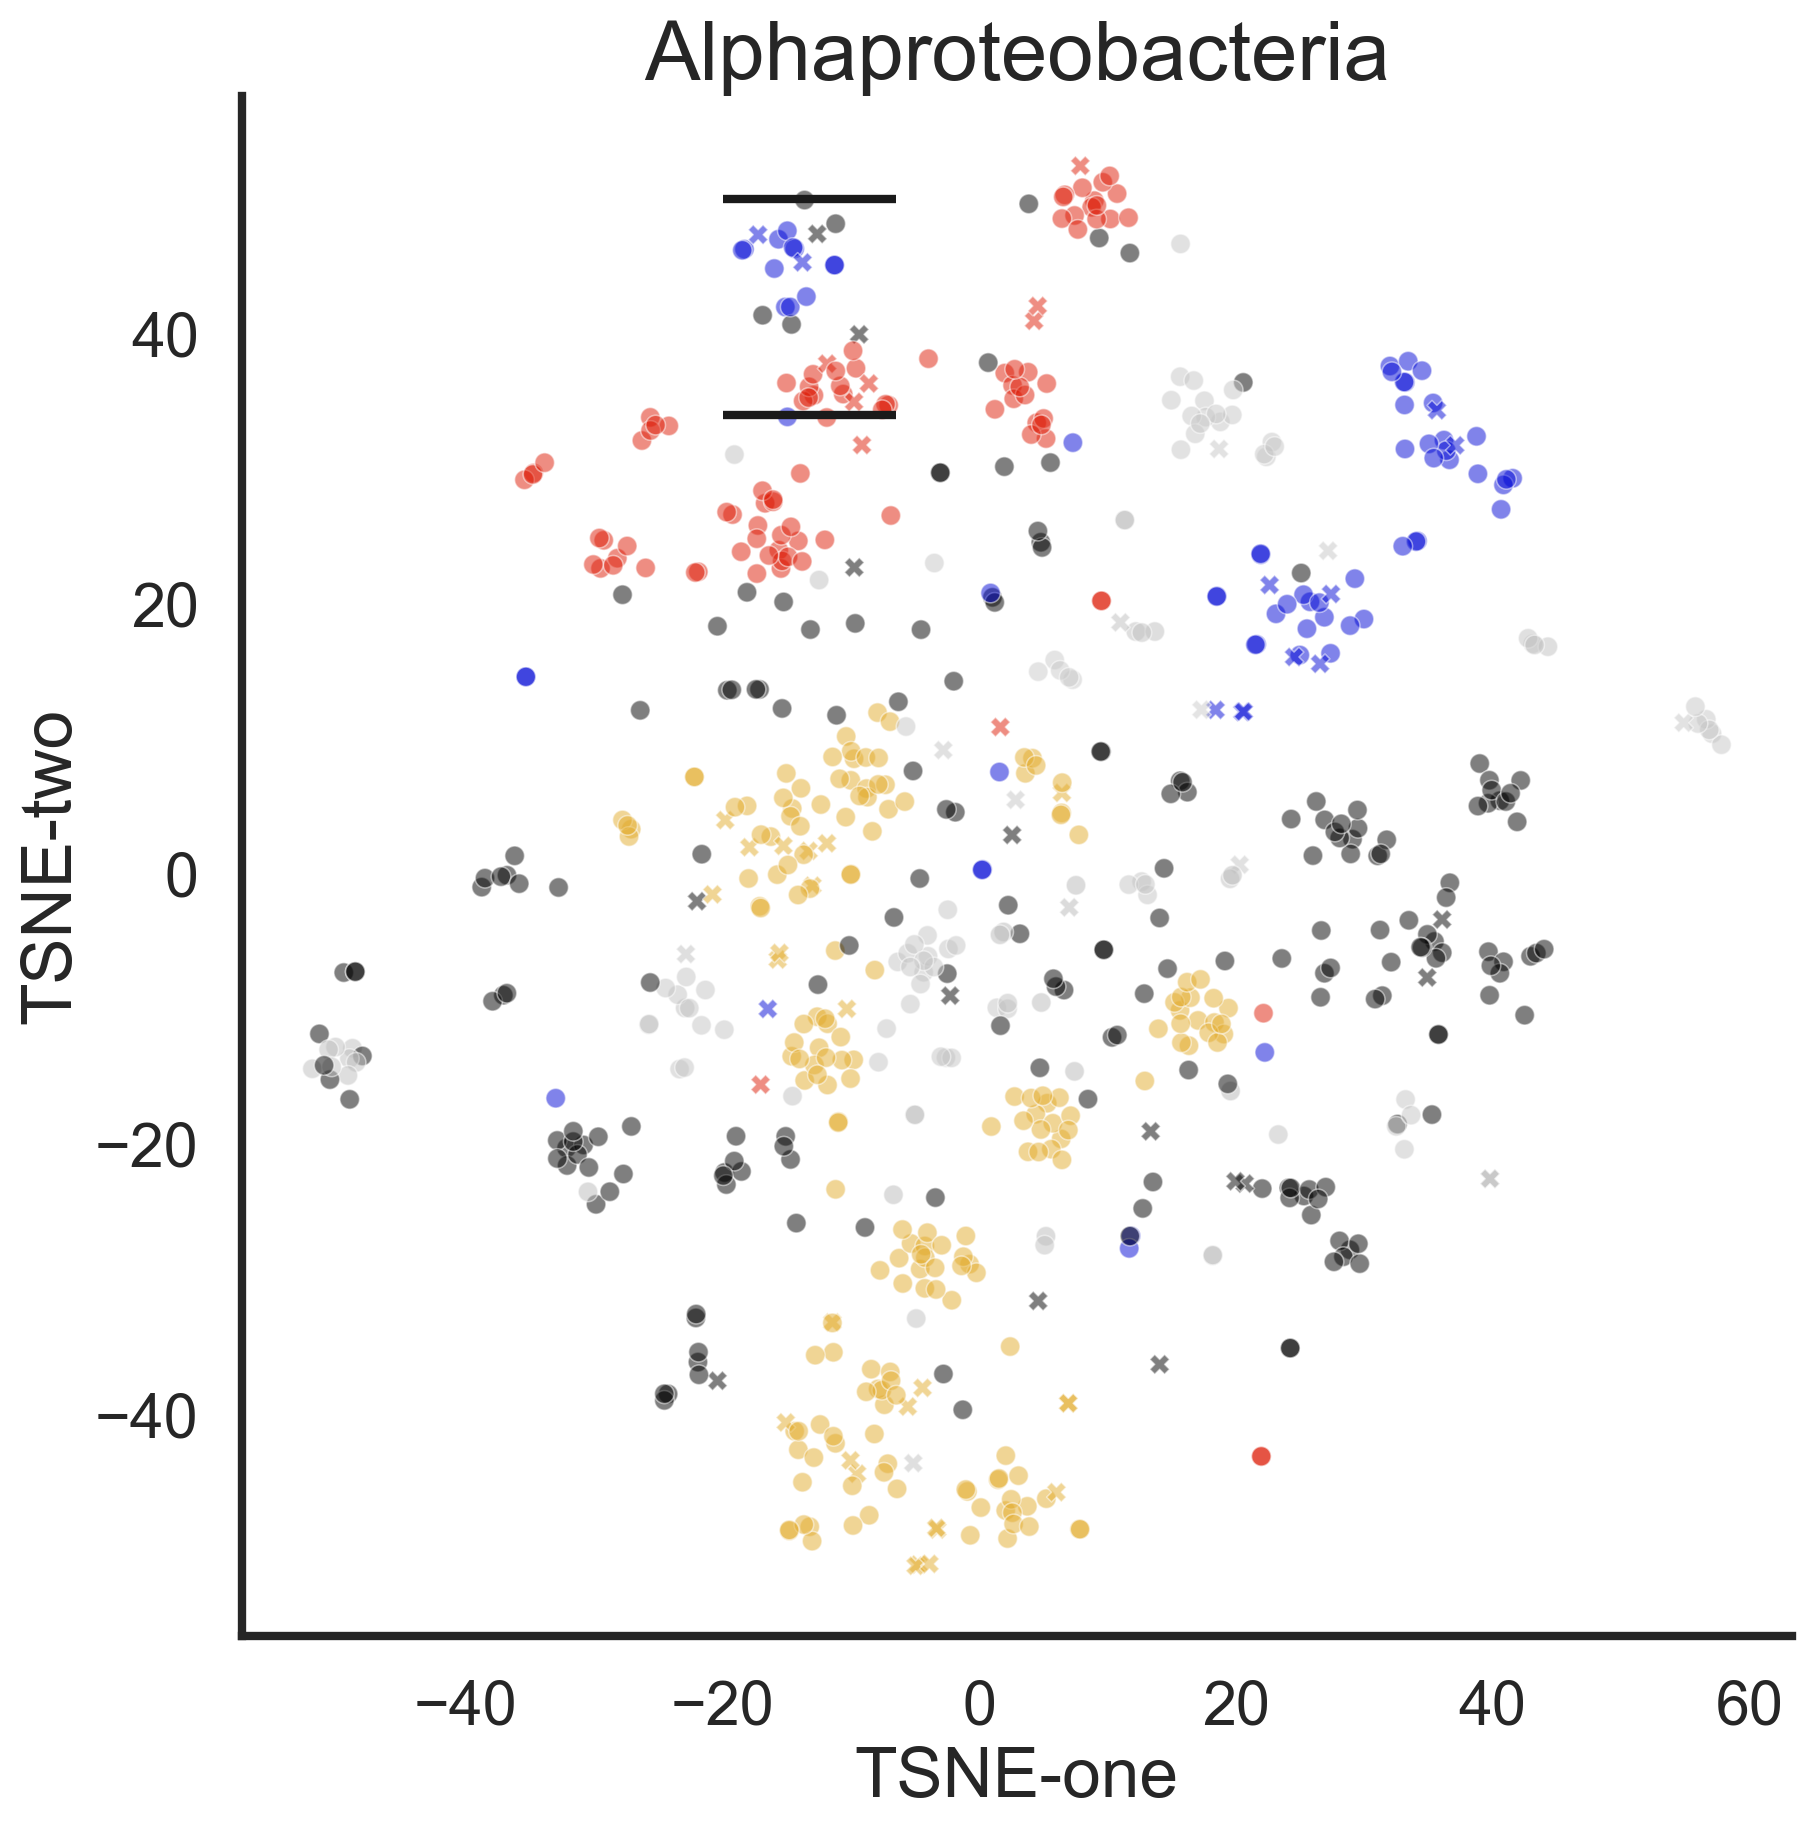

In [94]:
fig2, ax2  = plt.subplots(figsize =  (10,10))


source = TSNEs[0]
source["DBD"] = source["DBD"].fillna( "no domain")
source.dropna(how = "any", inplace= True)
# for ax, source in zip(axes, TSNEs):


subsource = source[(source["species"] == "PP") |
                   (source["class"]=="Alphaproteobacteria")
                  ]
sns.scatterplot(data =subsource, x ="tsne-pca500-one", y= "tsne-pca500-two",
                hue = "DBD",
                s = 50,
                style = "class",
                marker = "P",
                # hue_order= hue_order,
                legend = False,
                palette= palette(source),
                ax=ax2,
                alpha = 0.5
               )
TEXTS = []
for x,y,text in zip(subsource["tsne-pca500-one"], subsource["tsne-pca500-two"], subsource["id"]):
    # Only append selected countries
    text = text.split('-')[1]
    # if text not in [ "PP_5241","PP_3551", "PP_1066", "PP_1401", "PP_0263" ]:
    #     TEXTS.append(ax2.annotate(text, xy=(x, y), xycoords='data',
    #                              fontsize=12,
    #                              xytext=(x+random.randrange(25)/100*pos_neg(), 
    #                                      y+random.randrange(25)/100*pos_neg()), 
    #                              textcoords='offset points',
    #                              arrowprops=dict(arrowstyle="-", color='grey', alpha=0.5)))

 # use lines to define the boundary of the cluster
ax2.hlines(y = 34,
          xmin =-20,
          xmax=-6.5, color = "k")
ax2.hlines(y = 50,
          xmin = -20,
          xmax=-6.5, color = "k")

# define the boundary of the cluster
subcluster  =source[
    (source["tsne-pca500-one"]>=-20) &
    (source["tsne-pca500-one"]<=-6.5) &
    (source["tsne-pca500-two"]>=33) &
    (source["tsne-pca500-two"]<=50) &
    (source["class"].str.contains("Alp"))
          ]
ax2.set_ylabel("TSNE-two", fontsize =  25)
ax2.set_xlabel("TSNE-one", fontsize =  25)
ax2.set_title("Alphaproteobacteria", fontsize =  30)

# fig2.savefig(os.path.join(os.getcwd(), "Figures", 
#                           f"TSNE_alpha_highlight_subcluster.png"),
#             dpi = 500,
#             bbox_inches = "tight"
#            )

In [95]:
subsource

,Unnamed: 0,gene_id,version,phylum,class,order,family,genus,species_x,DBD,id,species,tsne-pca500-one,tsne-pca500-two
0,0,G566_RS15185,GCF_000420765.1,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sandarakinorhabdus,Sandarakinorhabdus limnophila,no domain,GCF_000420765.1-G566_RS15185,G566,-1.863427,4.570940
1,1,G566_RS0112345,GCF_000420765.1,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sandarakinorhabdus,Sandarakinorhabdus limnophila,Trans_reg_C,GCF_000420765.1-G566_RS0112345,G566,7.762449,2.894099
2,2,G566_RS0112200,GCF_000420765.1,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sandarakinorhabdus,Sandarakinorhabdus limnophila,no domain,GCF_000420765.1-G566_RS0112200,G566,9.347311,47.085217
3,3,G566_RS0111445,GCF_000420765.1,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sandarakinorhabdus,Sandarakinorhabdus limnophila,GerE,GCF_000420765.1-G566_RS0111445,G566,0.258750,0.335580
4,4,G566_RS0111135,GCF_000420765.1,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sandarakinorhabdus,Sandarakinorhabdus limnophila,Trans_reg_C,GCF_000420765.1-G566_RS0111135,G566,16.341639,-12.715870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,716,CEP68_RS17995,GCF_002208825.2,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas vesicularis,no domain,GCF_002208825.2-CEP68_RS17995,CEP68,10.759813,-11.928463
717,717,CEP68_RS17635,GCF_002208825.2,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas vesicularis,Sigma54_activat,GCF_002208825.2-CEP68_RS17635,CEP68,-9.829651,38.736080
718,718,CEP68_RS17580,GCF_002208825.2,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas vesicularis,HTH_8,GCF_002208825.2-CEP68_RS17580,CEP68,11.635271,48.585785
719,719,CEP68_RS20295,GCF_002208825.2,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas vesicularis,Trans_reg_C,GCF_002208825.2-CEP68_RS20295,CEP68,-7.837903,8.588882


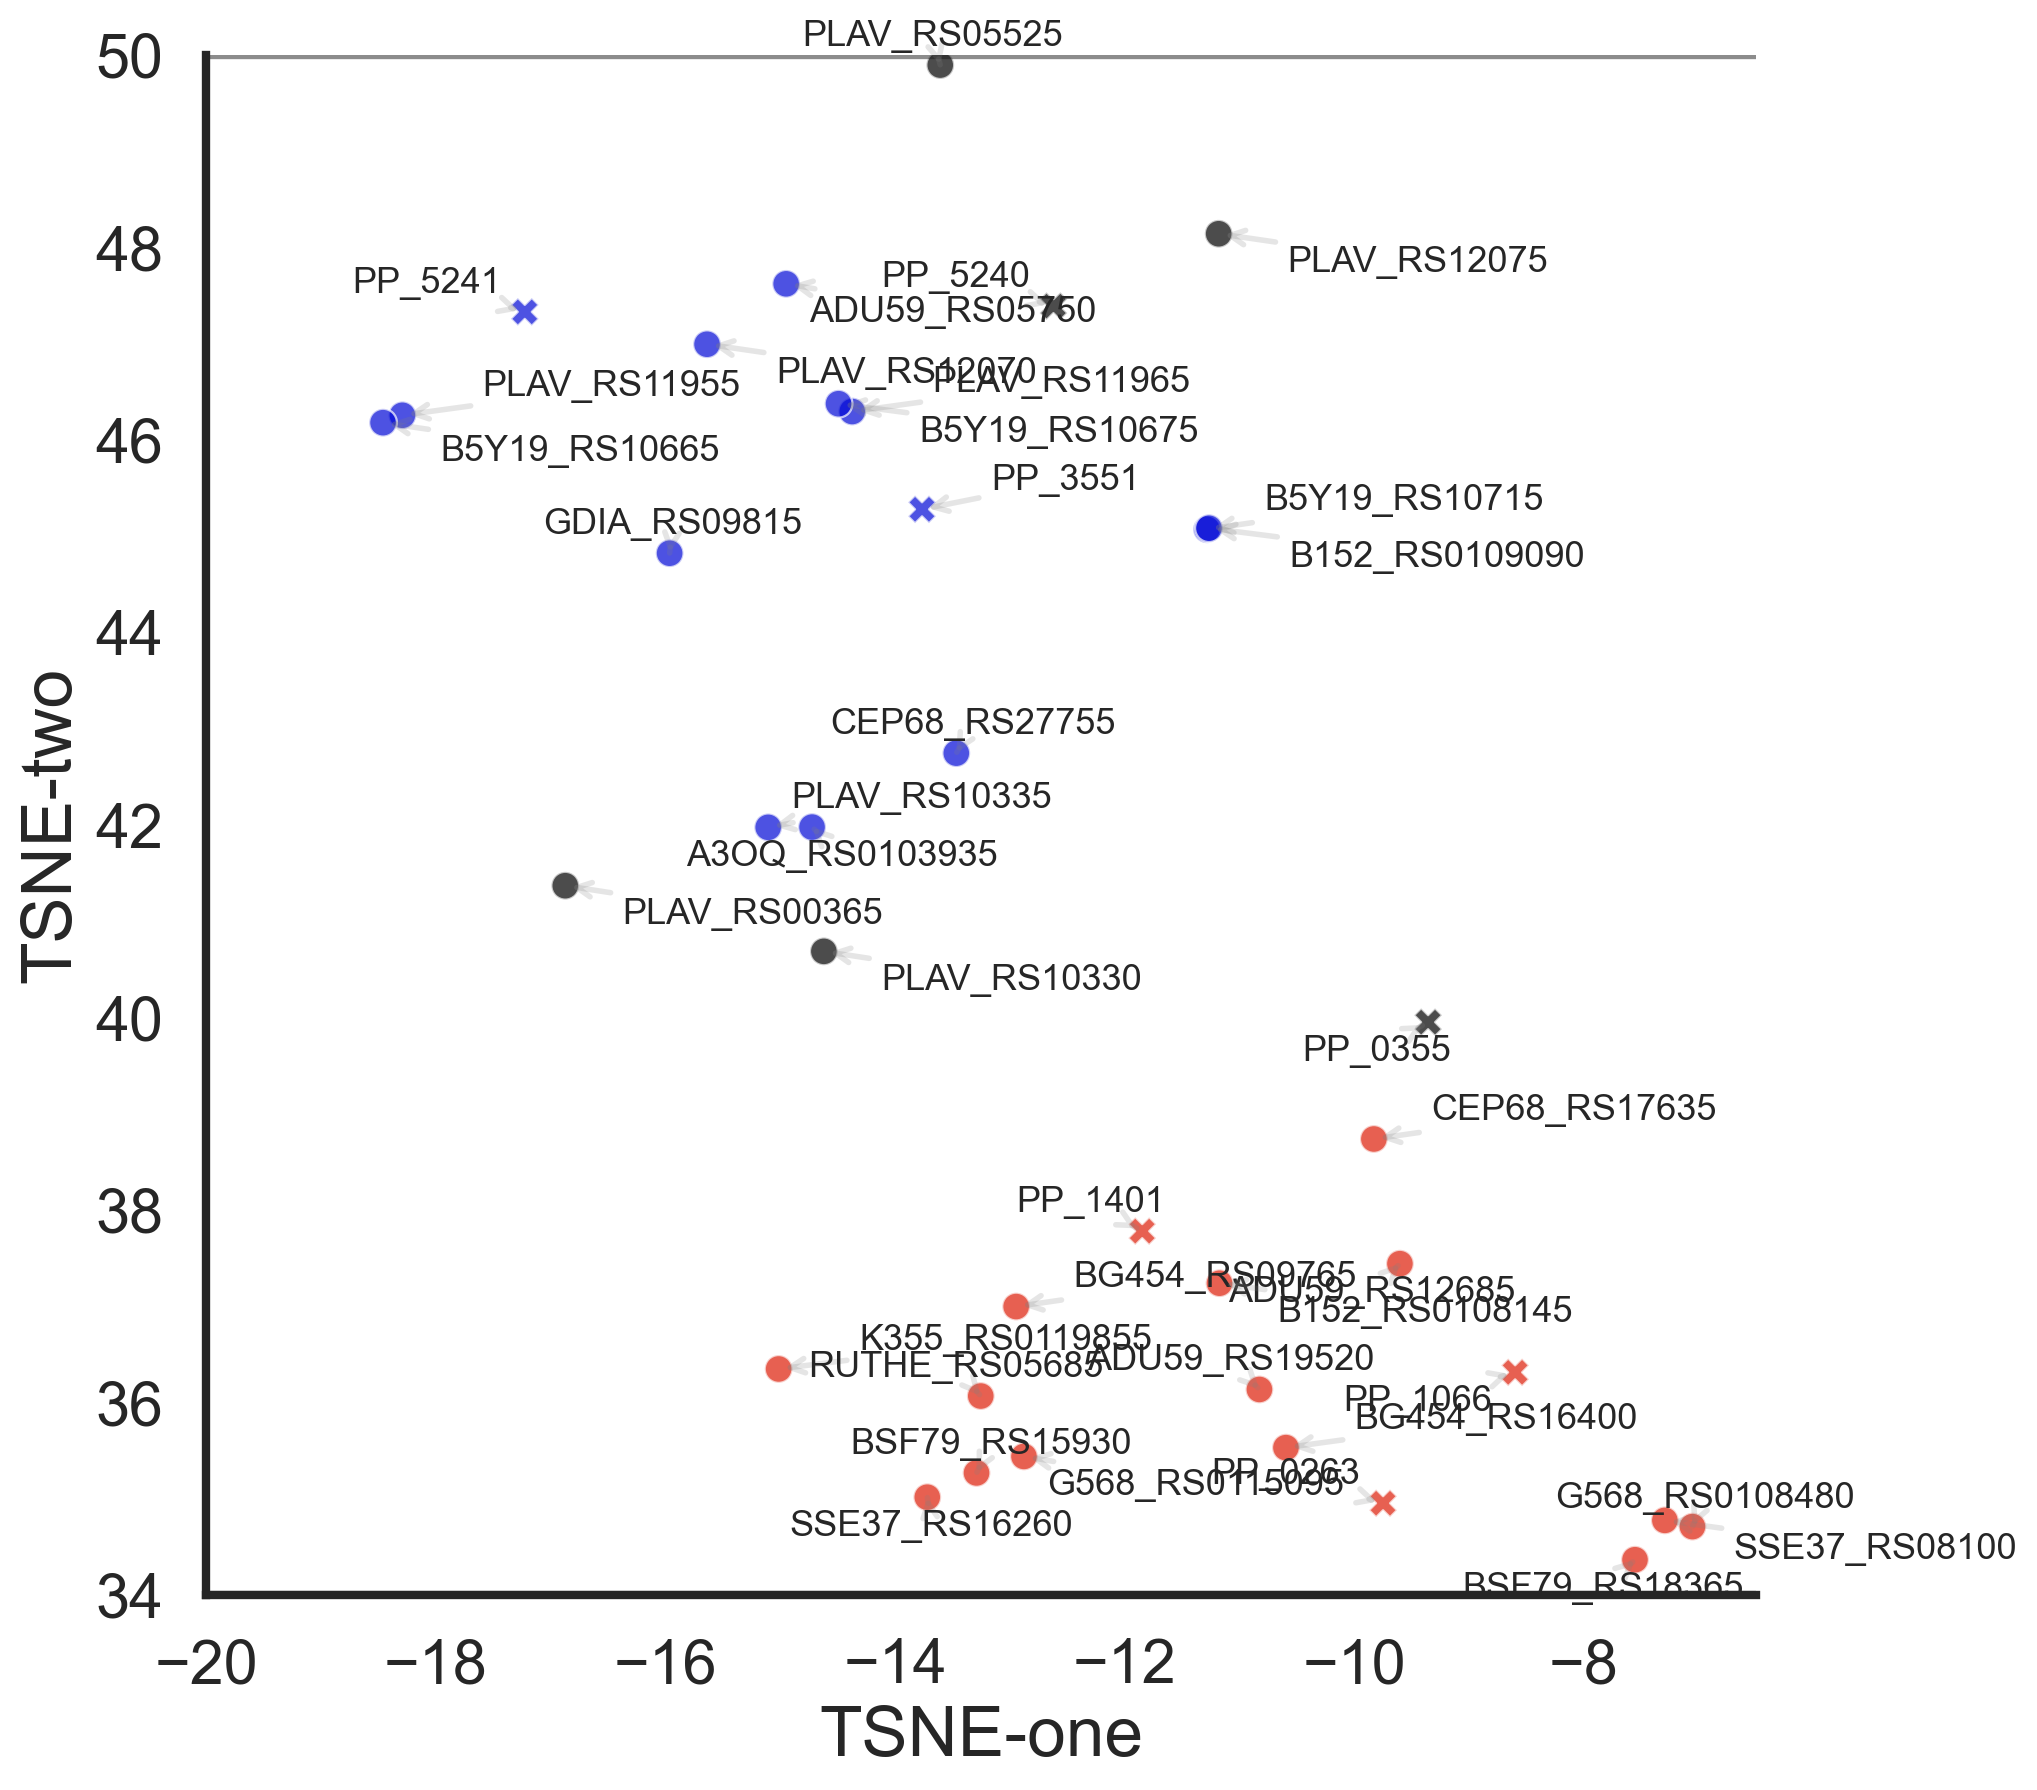

In [105]:
fig2, ax2  = plt.subplots(figsize =  (10,10))


source = TSNEs[0]
source["DBD"] = source["DBD"].fillna( "no domain")
source.dropna(how = "any", inplace= True)
# for ax, source in zip(axes, TSNEs):


subsource = source[(source["species"] == "PP") |
                   (source["class"]=="Alphaproteobacteria")
                  ]
sns.scatterplot(data =subsource, x ="tsne-pca500-one", y= "tsne-pca500-two",
                hue = "DBD",
                s = 100,
                style = "class",
                marker = "P",
                # hue_order= hue_order,
                legend = False,
                palette= palette(source),
                ax=ax2,
                alpha = 0.7
               )
TEXTS = []
for x,y,text in zip(subsource["tsne-pca500-one"], subsource["tsne-pca500-two"], subsource["id"]):
    # Only append selected countries
    text = text.split('-')[1]
    # if text not in [ "PP_5241","PP_3551", "PP_1066", "PP_1401", "PP_0263" ]:
    TEXTS.append(ax2.annotate(text, xy=(x, y), xycoords='data',
                             fontsize=13,
                             xytext=(x+random.sample([.6,.2,0.5, .7,-1.2,-1.5,-1.1,], 1)[0], 
                                     y+random.sample([.2,-.4], 1)[0]
                                    ), 
                             # textcoords='offset points',
                             arrowprops=dict(arrowstyle="->", color='grey', alpha=.2)
                             ))
                

 # use lines to define the boundary of the cluster
ax2.hlines(y = 34,
          xmin =-20,
          xmax=-6.5, color = "k",  alpha = 0.5)
ax2.hlines(y = 50,
          xmin = -20,
          xmax=-6.5, color = "k", alpha = 0.5)


ax2.set_ylabel("TSNE-two", fontsize =  25)
ax2.set_xlabel("TSNE-one", fontsize =  25)
ax2.set_ylim(34, 50)
ax2.set_xlim(-20, -6.5)

plt.show()
fig2.savefig(os.path.join(os.getcwd(), "Figures", 
                          f"TSNE_alpha_highlight_subcluster_zoom_with_bounds.png"),
            dpi = 500,
            bbox_inches = "tight"
           )


In [97]:
pos_neg()

-1

In [98]:
subcluster.drop("Unnamed: 0", axis = 1)
subcluster.to_csv(os.path.join(Subcluster_path,"Alphaproteobacteria_subcluster.csv"), index = False)

### Write Alphaproteobacteria genes in subcluster to a new fasta file
 - note: iqtree flagged PLAV_RS10330, so I am removing it from further  analysis

In [13]:
subcluster[subcluster["id"].str.contains("27755")]

,Unnamed: 0,gene_id,version,phylum,class,order,family,genus,species_x,DBD,id,species,tsne-pca500-one,tsne-pca500-two
698,698,CEP68_RS27755,GCF_002208825.2,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas vesicularis,GerE,GCF_002208825.2-CEP68_RS27755,CEP68,-13.466464,42.744583


In [14]:
records = []
for seq_record in SeqIO.parse(os.path.join(Align_path, "Full_RR_Alphaproteobacteria_4.fasta"), "fasta"):
    if str(seq_record.id) in list(subcluster["id"]) and  str(seq_record.id) not in [
    #    "GCF_001687365-1-ADU59_RS12685", # related to PP_1066
    #     "GCF_002208825-2-CEP68_RS17635", # related to PP_1066
    #     "GCF_001870665-2-BG454_RS16400", #related to PP_0263
    #     "GCF_001687365-1-ADU59_RS19520",  #related to PP_0263
    #     "GCF_000421265-1-K355_RS0119855", #related to PP_0263
    #     "GCF_000374005-1-B152_RS0108145", #related to PP_0263
    #     "GCF_000423645-1-G568_RS0115095", #related to PP_1401
    #     "GCF_900110775-1-BSF79_RS15930", #related to PP_1401
    #     "GCF_000169415-1-SSE37_RS16260", #related to PP_1401
    #     "GCF_000442315-1-RUTHE_RS05685", #related to PP_1401
    #     "GCF_001870665-2-BG454_RS09765", #related to PP_1401
        "GCF_000421265.1-K355_RS0117460", #possible outgroup (2)
        # "GCF_000423645-1-G568_RS0108480", #possible outgroup (1)
        # "GCF_000169415-1-SSE37_RS08100", #possible outgroup (1)
        # "GCF_900110775-1-BSF79_RS18365", #possible outgroup (1)
    ]:
        records.append(seq_record[0:110])
records


handle = open(os.path.join(Subcluster_path,"Alphaproteobacteria_subcluster_AA.cl"),"w")
SeqIO.write(records,handle,"clustal")



31

In [15]:
records = []
for seq_record in SeqIO.parse(os.path.join(Align_path, "RR_Alphaproteobacteria_hmmAlign_4.fasta"), "fasta"):
    if str(seq_record.id) in list(subcluster["id"]) and  str(seq_record.id) not in [
        "GCF_000017565.1-PLAV_RS00365", # gap rate too high
        "GCF_000421265.1-K355_RS0117460", # outgroup
        "GCF_000374005.1-B152_RS0116990", # outgroup
        "GCF_000017565.1-PLAV_RS10330", #iqtree : 10  GCF_000017565.1-PLAV_RS10330     55.51%    passed      5.31%
        # "GCF_001687365.1-ADU59_RS12685", # related to PP_1066
        # "GCF_002208825.2-CEP68_RS17635", # related to PP_1066
        "GCF_001870665.2-BG454_RS16400", #related to PP_0263
        "GCF_001687365.1-ADU59_RS19520",  #related to PP_0263
        "GCF_000421265.1-K355_RS0119855", #related to PP_0263
        "GCF_000374005.1-B152_RS0108145", #related to PP_0263
        "GCF_000423645.1-G568_RS0115095", #related to PP_1401
        "GCF_900110775.1-BSF79_RS15930", #related to PP_1401
        "GCF_000169415.1-SSE37_RS16260", #related to PP_1401
        "GCF_000442315.1-RUTHE_RS05685", #related to PP_1401
        "GCF_001870665.2-BG454_RS09765", #related to PP_1401
    ]:
        records.append(seq_record)
records


handle = open(os.path.join(Subcluster_path,"Alphaproteobacteria_subcluster.fasta"),"w")
SeqIO.write(records,handle,"fasta")



19

In [276]:
!/opt/iqtree/iqtree-1.6.12-Linux/bin/iqtree -s {os.path.join(Subcluster_path,"Alphaproteobacteria_subcluster.fasta")} -m LG+G4 -bb 1000 -redo


IQ-TREE multicore version 1.6.12 for Linux 64-bit built Aug 15 2019
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    jupyter (AVX, FMA3, 503 GB RAM)
Command: /opt/iqtree/iqtree-1.6.12-Linux/bin/iqtree -s /opt/jupyterhub/shared_notebooks/m-group/ALI/MG_stuff/RR_bioinformatics/TCSplayground/Alphaproteobacteria_subcluster/Alphaproteobacteria_subcluster.fasta -m LG+G4 -bb 1000 -redo
Seed:    836148 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Sun Sep 18 13:59:08 2022
Kernel:  AVX+FMA - 1 threads (64 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 64 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /opt/jupyterhub/shared_notebooks/m-group/ALI/MG_stuff/RR_bioinformatics/TCSplayground/Alphaproteobacteria_subcluster/Alphaproteobacteria_subcluster.fasta ... ERROR: Cannot read file /opt/jupyterhub/

/tmp/ipykernel_10076/2095448221.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source["DBD"] = source["DBD"].fillna( "no domain")
/usr/local/share/jupyteruser/.virtualenvs/biopython_3.8-kHq-BLTU/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir, Avenir Next, Avenir Next Condensed, Arial


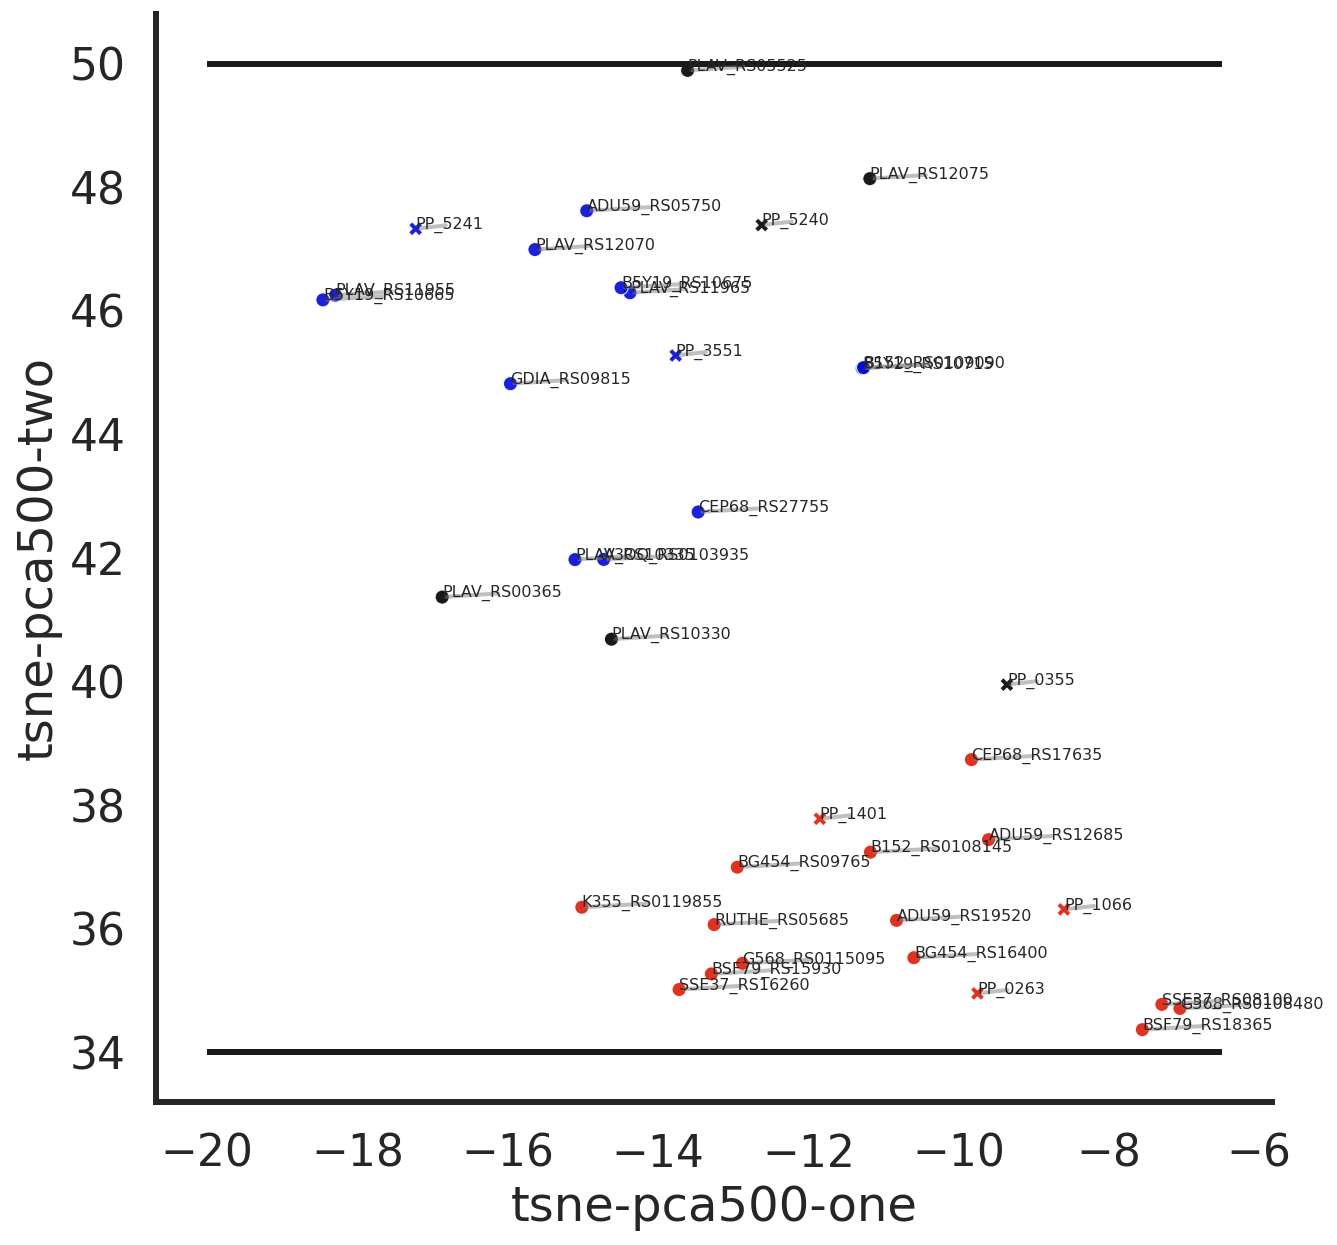

In [ ]:
fig2, ax2  = plt.subplots(figsize =  (10,10))


subclusterPP  =source[
    (source["tsne-pca500-one"]>=-20) &
    (source["tsne-pca500-one"]<=-6.5) &
    (source["tsne-pca500-two"]>=34) &
    (source["tsne-pca500-two"]<=50) 
          ]

source = subclusterPP
source["DBD"] = source["DBD"].fillna( "no domain")
source.dropna(how = "any", inplace= True)
# for ax, source in zip(axes, TSNEs):


subsource = source[(source["species"] == "PP") |
                   (source["class"]=="Alphaproteobacteria")
                  ]
sns.scatterplot(data =subsource, x ="tsne-pca500-one", y= "tsne-pca500-two",
                hue = "DBD",
                s = 50,
                style = "class",
                marker = "P",
                # hue_order= hue_order,
                legend = False,
                palette= palette(source),
                ax=ax2,
                alpha = 0.9
               )
TEXTS = []
for x,y,text in zip(subsource["tsne-pca500-one"], subsource["tsne-pca500-two"], subsource["id"]):
    # Only append selected countries
    text = text.split('-')[1]
    # if text in [
    #     # "PP_5241","PP_3551", "PP_1066", "PP_1401", "PP_0263",
    #             "PLAV_RS11965", "PLAV_RS00365"]:
    TEXTS.append(ax2.annotate(text, xy=(x, y), xycoords='data',
                             fontsize=8,
                             # xytext=(x+random.randrange(25)/100*pos_neg(), 
                             #         y+random.randrange(25)/100*pos_neg()), 
                             # textcoords='offset points',
                             arrowprops=dict(arrowstyle="-", color='grey', alpha=0.5)))

 # use lines to define the boundary of the cluster
ax2.hlines(y = 34,
          xmin =-20,
          xmax=-6.5, color = "k")
ax2.hlines(y = 50,
          xmin = -20,
          xmax=-6.5, color = "k")

# define the boundary of the cluster
subcluster  =source[
    (source["tsne-pca500-one"]>=-20) &
    (source["tsne-pca500-one"]<=-6.5) &
    (source["tsne-pca500-two"]>=34) &
    (source["tsne-pca500-two"]<=52) &
    (source["class"].str.contains("Alp"))
          ]

fig2.savefig(os.path.join("Figures", "Alphaproteobacteria_subcluster.png"), 
                          dpi = 500, 
                                     bbox_inches = "tight"
)

In [285]:
noGerE_subcluster= subcluster[subcluster["DBD"].isin(["HTH_8", "Sigma54_activat"])]

records = []
for seq_record in SeqIO.parse(os.path.join(Align_path, "RR_Alphaproteobacteria_hmmAlign_4.fasta"), "fasta"):
    if str(seq_record.id) in list(noGerE_subcluster["id"]) and  str(seq_record.id) not in [
        "GCF_000017565.1-PLAV_RS00365", # gap rate too high
        "GCF_000421265.1-K355_RS0117460", # outgroup
        "GCF_000374005.1-B152_RS0116990", # outgroup
        # "GCF_000017565.1-PLAV_RS10330", #iqtree : 10  GCF_000017565.1-PLAV_RS10330     55.51%    passed      5.31%
        # "GCF_001687365.1-ADU59_RS12685", # related to PP_1066 (polytomy)
        # "GCF_002208825.2-CEP68_RS17635", # related to PP_1066 (polytomy)
        # "GCF_001870665.2-BG454_RS16400", #related to PP_1401
        # "GCF_001687365.1-ADU59_RS19520",  #related to PP_1401
        # "GCF_000421265.1-K355_RS0119855", #related to PP_1401
        # "GCF_000374005.1-B152_RS0108145", #related to PP_1401
        # "GCF_000423645.1-G568_RS0115095", #related to PP_1066
        # "GCF_900110775.1-BSF79_RS15930", #related to PP_1066
        # "GCF_000169415.1-SSE37_RS16260", #related to PP_1066
        # "GCF_000442315.1-RUTHE_RS05685", #related to PP_1066
        # "GCF_001870665.2-BG454_RS09765", #related to PP_1066
                                                                                   ]:
        records.append(seq_record)
records


handle = open(os.path.join(Subcluster_path,"Alphaproteobacteria_subcluster_noGerE.fasta"),"w")
SeqIO.write(records,handle,"fasta")

14

In [286]:
!/opt/iqtree/iqtree-1.6.12-Linux/bin/iqtree -s {os.path.join(Subcluster_path, "Alphaproteobacteria_subcluster_noGerE.fasta")} -m LG+G4 -bb 1000 -redo


IQ-TREE multicore version 1.6.12 for Linux 64-bit built Aug 15 2019
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    jupyter (AVX, FMA3, 503 GB RAM)
Command: /opt/iqtree/iqtree-1.6.12-Linux/bin/iqtree -s /opt/jupyterhub/shared_notebooks/m-group/ALI/MG_stuff/RR_bioinformatics/TCSplayground/Alphaproteobacteria_subcluster/Alphaproteobacteria_subcluster_noGerE.fasta -m LG+G4 -bb 1000 -redo
Seed:    551154 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Sun Sep 18 14:00:33 2022
Kernel:  AVX+FMA - 1 threads (64 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 64 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /opt/jupyterhub/shared_notebooks/m-group/ALI/MG_stuff/RR_bioinformatics/TCSplayground/Alphaproteobacteria_subcluster/Alphaproteobacteria_subcluster_noGerE.fasta ... Fasta format detected
Alig

# Write nucleotide fasta file 